# Resource Prices

In [1]:
import os
from matplotlib import pyplot as plt
import matplotlib.lines as mlines
from collections import OrderedDict
import matplotlib.patches as patches
from matplotlib.lines import Line2D
import matplotlib.patheffects as path_effects


In [2]:
print("="*80)
print("Resource Prices")
print("-"*80)

Resource Prices
--------------------------------------------------------------------------------


In [3]:
# ensure figures dir exists
os.makedirs('figures', exist_ok=True)

In [4]:
# AWS Lambda
P_LAMBDA_PER_GBS = 0.0000166667 # https://aws.amazon.com/lambda/pricing/ # CPU proportionally allocated. 1vCPU under 1769MB
P_LAMBDA_CPU_PER_VCPUSECOND  = 0

# GCP Cloud Run request-based
P_GCP_CPU_PER_VCPUSECOND = 0.00002400 # https://cloud.google.com/run/pricing
P_GCP_MEMORY_PER_GBSECOND = 0.00000250  # https://cloud.google.com/run/pricing

# GCP Cloud Run instance-based
P_GCP_INSTANCE_CPU_PER_VCPUSECOND = 0.000018 # https://cloud.google.com/run/pricing
P_GCP_INSTANCE_MEMORY_PER_GBSECOND = 0.000002  # https://cloud.google.com/run/pricing

# Azure Functions consumption plan
P_AZURE_COONSUMPTION_PER_GBS = 0.000016 # https://azure.microsoft.com/en-us/pricing/details/functions/
P_AZURE_FLEX_COONSUMPTION_PER_GBS = 0.000026 # https://azure.microsoft.com/en-us/pricing/details/functions/

# IBM Code Engine Functions
P_IBM_CPU_PER_VCPUSECOND = 0.00003431 # https://cloud.ibm.com/containers/serverless/overview
P_IBM_MEMORY_PER_GBSECOND = 0.00000356 # https://cloud.ibm.com/containers/serverless/overview

# Huawei FunctionGraph
P_HUAWEI_PER_GBS = 0.00001667 # https://www.huaweicloud.com/intl/en-us/pricing/calculator.html?tab=detail#/function

# Alibaba Cloud Function Compute
P_ALIBABA_CPU_PER_VCPUSECOND = 1 * 0.000020 # https://www.alibabacloud.com/help/en/functioncompute/fc-2-0/product-overview/pay-as-you-go-billing-method?spm=a2c63.p38356.help-menu-2508973.d_0_3_3.26923fe1BiuSBt
P_ALIBABA_MEMORY_PER_GBSECOND = 0.15 * 0.000020 # https://www.alibabacloud.com/help/en/functioncompute/fc-2-0/product-overview/pay-as-you-go-billing-method?spm=a2c63.p38356.help-menu-2508973.d_0_3_3.26923fe1BiuSBt

# Oracle Cloud Functions
P_ORACLE_PER_GBS = 0.00001417 # https://www.oracle.com/ca-en/cloud/price-list/#pricing-containers

# Vercel Functions
P_VERCEL_PER_GBS = 0.18 / 3600 # https://vercel.com/docs/functions/usage-and-pricing

# Cloudflare Workers
P_CLOUDFLARE_CPU_PER_MS = 0.02 / 1000000 # https://developers.cloudflare.com/workers/platform/pricing/

In [5]:
cpu_prices = [
    P_LAMBDA_CPU_PER_VCPUSECOND,
    P_GCP_CPU_PER_VCPUSECOND,
    P_GCP_INSTANCE_CPU_PER_VCPUSECOND,
    0,  # Azure Consumption Functions Memory-only billing
    0,  # Azure Flex Consumption Memory-only billing
    P_IBM_CPU_PER_VCPUSECOND,
    0,  # Huawei Memory-only billing
    P_ALIBABA_CPU_PER_VCPUSECOND,
    0,  # Oracle Memory-only billing
    0,  # Vercel Memory-only billing
    P_CLOUDFLARE_CPU_PER_MS * 1000,  # Convert to $/vCPU-seconds
]

mem_prices = [
    P_LAMBDA_PER_GBS,
    P_GCP_MEMORY_PER_GBSECOND,
    P_GCP_INSTANCE_MEMORY_PER_GBSECOND,
    P_AZURE_COONSUMPTION_PER_GBS,
    P_AZURE_FLEX_COONSUMPTION_PER_GBS,
    P_IBM_MEMORY_PER_GBSECOND,
    P_HUAWEI_PER_GBS,
    P_ALIBABA_MEMORY_PER_GBSECOND,
    P_ORACLE_PER_GBS,
    P_VERCEL_PER_GBS,
    0,  # Cloudflare CPU-only billing
]

Figure saved to billing/figures/resource_prices.pdf


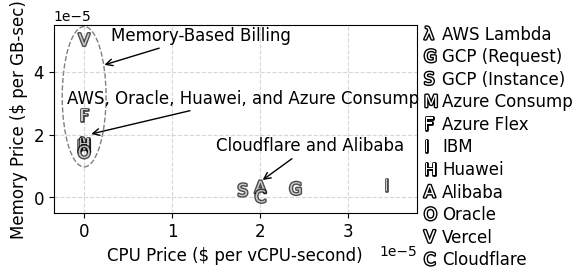

In [6]:
# Abbreviations and platforms
platforms = [
    'AWS Lambda', 'GCP (Request)', 'GCP (Instance)', 'Azure Consump', 'Azure Flex',
    'IBM', 'Huawei', 'Alibaba',
    'Oracle', 'Vercel', 'Cloudflare',
]
abbr = ['λ', 'G', 'S', 'M', 'F', 'I', 'H', 'A', 'O', 'V', 'C']

# Create figure with specified size
fig, ax = plt.subplots(figsize=(6, 3))

# Plot each platform abbreviation with hollow, larger text
for x, y, code in zip(cpu_prices, mem_prices, abbr):
    txt = ax.text(
        x, y, code,
        fontsize=12,
        ha='center', va='center',
        color='white',
        alpha=0.7
    )
    txt.set_path_effects([
        path_effects.Stroke(linewidth=2, foreground='black'),
        path_effects.Normal()
    ])

# Highlight memory-only platforms
mem_only_indices = [i for i, x in enumerate(cpu_prices) if x == 0]
mem_y = [mem_prices[i] for i in mem_only_indices]
center_x = 0
center_y = (max(mem_y) + min(mem_y)) / 2
radius = (max(mem_y) - min(mem_y)) / 4
ellipse = patches.Ellipse(
    (center_x, center_y),
    width=radius/1.8,
    height=radius * 5,
    fill=False, edgecolor='grey', linewidth=1, linestyle='--'
)
ax.add_patch(ellipse)

# Annotations
ax.annotate('Memory-Based Billing',
            xy=(0.2e-5, 4.2e-5),
            xytext=(0.3e-5, 5e-5),
            arrowprops=dict(arrowstyle='->'), fontsize=12)

ax.annotate('AWS, Oracle, Huawei, and Azure Consump',
            xy=(0.05e-5, 2e-5),
            xytext=(-0.2e-5, 3e-5),
            arrowprops=dict(arrowstyle='->'), fontsize=12)

ax.annotate('Cloudflare and Alibaba',
            xy=(2e-5, 0.5e-5),
            xytext=(1.5e-5, 1.5e-5),
            arrowprops=dict(arrowstyle='->'), fontsize=12)

# Manual legend: single column on right side with increased row spacing
legend_x = 1.02  # axes coords just outside
legend_y = 0.95
y_step = 0.12  # increased spacing

for i in range(len(abbr)):
    lx = legend_x
    ly = legend_y - i * y_step
    # Symbol (hollow)
    sym = ax.text(
        lx, ly, abbr[i],
        transform=ax.transAxes,
        fontsize=12, ha='left', va='center', color='white'
    )
    sym.set_path_effects([
        path_effects.Stroke(linewidth=2, foreground='black'),
        path_effects.Normal()
    ])
    # Label text (normal)
    ax.text(
        lx + 0.05, ly, platforms[i],
        transform=ax.transAxes,
        fontsize=12, ha='left', va='center', color='black'
    )

# Axis labels and limits
ax.set_xlabel('CPU Price ($ per vCPU-second)', fontsize=12)
ax.set_ylabel('Memory Price ($ per GB-sec)', fontsize=12)
ax.set_xlim(max(cpu_prices) * -0.1, max(cpu_prices) * 1.1)
ax.set_ylim(max(mem_prices) * -0.1, max(mem_prices) * 1.1)

# set the tick label font size
ax.tick_params(axis='both', which='major', labelsize=12)


ax.grid(alpha=0.5, linestyle='--')

plt.tight_layout()
plt.savefig('figures/resource_prices.pdf')
print("Figure saved to billing/figures/resource_prices.pdf")
plt.show()